In [1]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [2]:
trial = "numWorkerProc_linear_1_16"
df, spec = dataset.load(bucket="perfd", 
                  app_name="nginx",
                  trial=trial)
with pd.option_context('display.max_rows', None, 'display.max_columns',None):
    display(df.sort_values("numWorkerProc"))

,level_0,index,numServerInstance,numClientInstance,serverInstanceType,clientInstanceType,fileSize,reqRate,numWorkerProc,numConn,duration,numClientThread,debug,lat_50pc,lat_75pc,lat_99pc,rps,throughput,tenancy
0,0,0,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.58,3.20,4.32,996.67,952.32,default
19,19,19,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.59,3.19,4.34,996.65,952.32,default
18,18,18,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.68,3.31,4.47,996.64,952.32,default
17,17,17,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.71,3.32,4.35,996.62,952.32,default
16,16,16,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.63,3.23,4.30,996.63,952.32,default
15,15,15,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.67,3.27,4.37,996.68,952.32,default
13,13,13,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.60,3.21,4.45,996.67,952.32,default
12,12,12,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.66,3.29,4.37,996.65,952.32,default
11,11,11,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.70,3.34,4.34,996.61,952.32,default
10,10,10,1,1,c5.4xlarge,c5.xlarge,1000,1000,1,50,30,1,False,2.66,3.30,4.34,996.66,952.32,default


adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-------+------+------+------+-------+-------+------+------+--------+-------+
| False |  lr  | knn  |  rf  |  svm  | svm_k |  nn  | best | oracle | naive |
+-------+------+------+------+-------+-------+------+------+--------+-------+
| nginx | 78.1 | 53.1 | 24.1 | 189.1 |  79.0 | 72.8 | 24.1 |  15.6  | 179.0 |
+-------+------+------+------+-------+-------+------+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-----+-----+-----+-----+------+-----+-----+-----+-----+------+------+------+------+------+------+------+
| App/RMSRE(%) | 1.0 | 2.0 | 3.0 | 4.0 | 5.0  | 6.0 | 7.0 | 8.0 | 9.0 | 10.0 | 11.0 | 12.0 | 13.0 | 14.0 | 15.0 | 16.0 |
+--------------+-----+-----+-----+-----+------+-----+-----+-----+-----+------+------+------+------+------+------+------+
|    nginx     | 1.3 | 1.2 | 2.0 | 1.9 | 61.7 | 0.7 | 0.2 | 4.2 | 0.1 | 5.1  | 0.

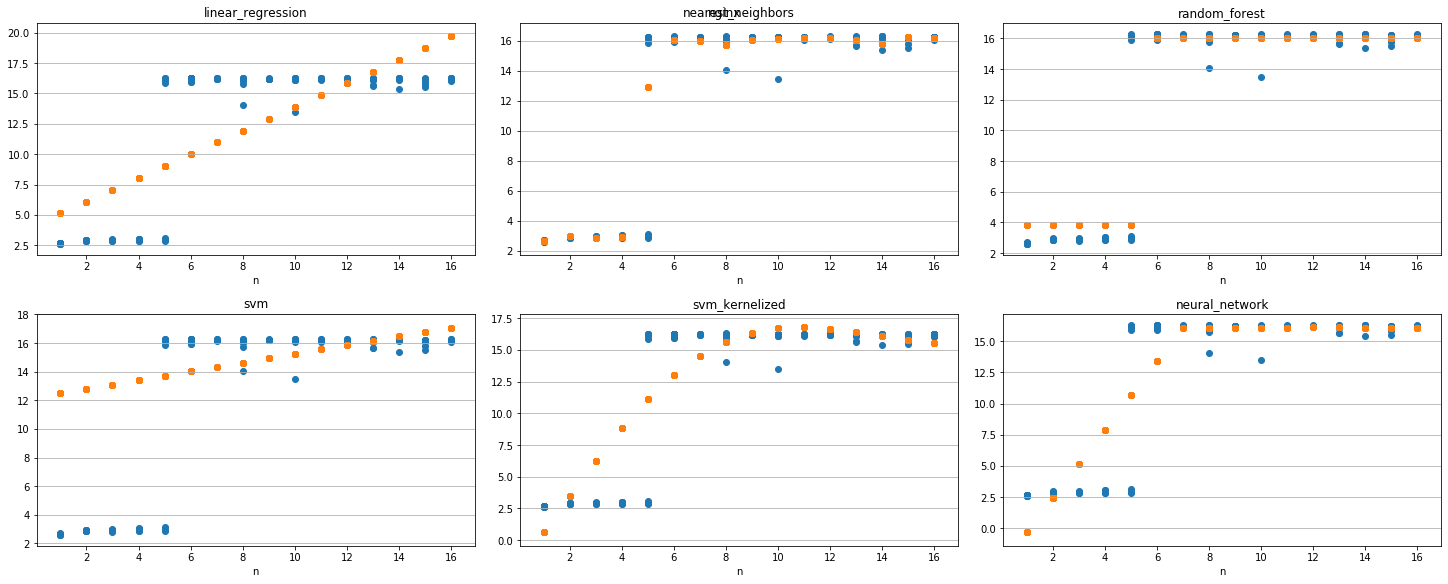

In [3]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "nginx"
ctx["feature"] = ctx["feature_mode"] = ["numWorkerProc"]
ctx["target_feature"] = "lat_50pc"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"nginx": df})

adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-------+-------+------+------+------+-------+------+------+--------+-------+
| False |   lr  | knn  |  rf  | svm  | svm_k |  nn  | best | oracle | naive |
+-------+-------+------+------+------+-------+------+------+--------+-------+
| nginx | 110.7 | 50.5 | 27.8 | 47.4 |  47.4 | 59.2 | 27.8 |  12.6  | 114.4 |
+-------+-------+------+------+------+-------+------+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-----+-----+-----+-----+------+-----+-----+-----+-----+------+------+------+------+------+------+------+
| App/RMSRE(%) | 1.0 | 2.0 | 3.0 | 4.0 | 5.0  | 6.0 | 7.0 | 8.0 | 9.0 | 10.0 | 11.0 | 12.0 | 13.0 | 14.0 | 15.0 | 16.0 |
+--------------+-----+-----+-----+-----+------+-----+-----+-----+-----+------+------+------+------+------+------+------+
|    nginx     | 0.0 | 0.0 | 0.0 | 0.0 | 50.3 | 0.1 | 0.2 | 0.2 | 0.2 | 0.2  | 0.

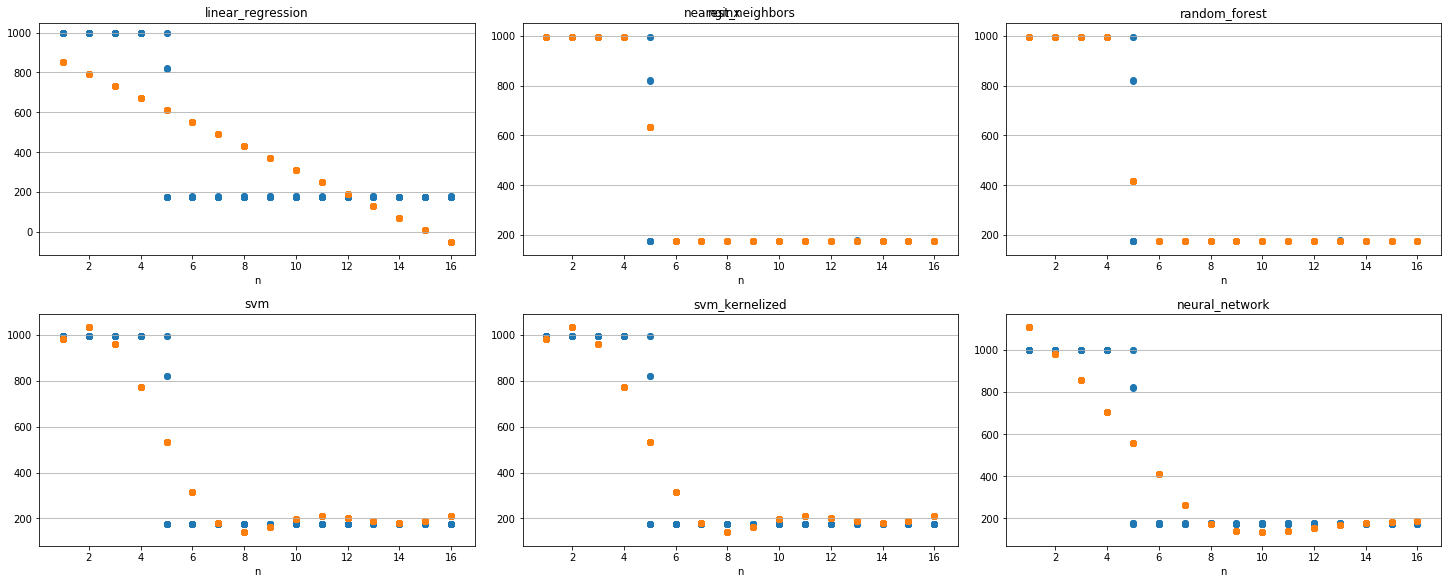

In [4]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "nginx"
ctx["feature"] = ctx["feature_mode"] = ["numWorkerProc"]
ctx["target_feature"] = "rps"
ctx["testset_ratio"] = 0.5
ctx["reload"] = True
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"nginx": df})